## **Studi Analitik Data Transjakarta: Identifikasi Pola Pengguna, Metode Pembayaran guna Optimalisasi layanan**

Created by: Farah Az-zahra Cubeba (JCDSOLL-001)

<hr>

# **A. Latar Belakang**


Transportasi umum memegang peranan penting dalam mendukung mobilitas masyarakat perkotaan. Di Jakarta, Transjakarta hadir sebagai sistem  *Bus Rapid Transit* atau BRT. Keberadaanya sendiri bertujuan untuk menyediakan transportasi umum yang terjangkau, dapat mengurangi kemacetan, serta ramah lingkungan.

Namun, dalam praktiknya di lapangan [Transjakarta mengalami berbagai kendala](https://news.detik.com/berita/d-8058951/mereka-menjerit-berjam-jam-antre-di-transj-jalur-langit) seperti tingginya volume penumpang pada jam tertentu, keterlambatan jadwal yang menyebabkan ketidakpastian jadwal dan waktu tempuh [akibat kondisi lalu lintas](https://megapolitan.kompas.com/read/2025/08/19/09395781/ini-penyebab-sejumlah-layanan-transjakarta-terlambat-selasa-pagi), pengelolaan rute dan halte yang belum optimal,serta [kendala lainnya](https://www.kompas.id/artikel/seorang-pria-menganiaya-perempuan-di-dalam-bus-transjakarta) seperti keamanan,kenyamanan maupun [pembayaran](https://www.tempo.co/arsip/sistem-tap-in-dan-tap-out-transjakarta-sempat-bermasalah-ini-cara-mengadu-ke-ylki-274581) atau layanan digital.

Dengan semakin meningkatnya kebutuhan transportasi publik yang efisien, analisis data operasional (seperti jumlah penumpang, rute, waktu perjalanan, dan metode pembayaran) menjadi penting untuk mendukung pengambilan keputusan manajemen Transjakarta.

<hr>

## **B. Tujuan, Rumusan Masalah & Hipotesis**

## **B.1. Tujuan**

Adapun tujuan dari analisis ini dilakukan yaitu:

1. Mengidentifikasi pola penggunaan layanan TransJakarta berdasarkan data perjalanan penumpang (tap in, tap out, halte, rute, waktu, dan pembayaran).

2. Mengidentifikasi profil demografi pengguna (usia dan gender).

3. Menganalisis perikalu pengguna berdasarkan data layanan pembayaran digital.

4. Menyusun rekomendasi optimalisasi rute dan layanan berbasis temuan analitik, agar dapat meningkatkan efisiensi operasional serta kenyamanan penumpang.


## **B.2. Rumusan Masalah**

Berdasarkan latar belakang di atas, maka dapat dirumuskan beberapa masalah utama sebagai berikut:

 - Bagaimana pola penggunaan layanan Transjakarta oleh penumpang berdasarkan waktu dan lokasi?
 - Seperti apa profil demografis yang mendominasi pengguna Tansjakarta?
 - Bagaimana analisis metode pembayaran dapat membantu memetakan perilaku konsumen?
 - Apa rekomendasi strategis yang dapat diberikan untuk meningkatkan layanan, kenyamanan, dan efisiensi operasional Transjakarta?



## **B.3. Hipotesis**

Adapun hipotesis H0 untuk studi analitik ini yaitu:

**H0**: Tidak ada perbedaan rata-rata durasi perjalanan (tapOutTime − tapInTime) antar koridor.

**H1**: Ada perbedaan rata-rata durasi perjalanan antar koridor.

<hr>

## **C. Data** 

Untuk menyelesaikan permasalahan ini, Digunakan dataset `Transjakarta.csv`. Dataset ini dapat diunduh [di laman ini](https://drive.google.com/drive/folders/1S04hk5uHfHYe6J1S6fVqDunuja1Lk1Lo)


**Kolom Deskripsi:**

1.	**transID**: Unique transaction id for every transaction
2.	**payCardID**: Customers main identifier. The card customers use as a ticket for entrance and exit.
3.	**payCardBank**: Customers card bank issuer name
4.	**payCardName**: Customers name that is embedded in the card.
5.	**payCardSex**: Customers sex that is embedded in the card
6.	**payCardBirthDate**: Customers birth year
7.	**corridorID**: Corridor ID / Route ID as key for route grouping.
8.	**corridorName**: Corridor Name / Route Name contains Start and Finish for each route.
9.	**direction**: 0 for Go, 1 for Back. Direction of the route.
10.	**tapInStops**: Tap In (entrance) Stops ID for identifying stops name
11.	**tapInStopsName**: Tap In (entrance) Stops Name where customers tap in.
12.	**tapInStopsLat**: Latitude of Tap In Stops
13.	**tapInStopsLon**: Longitude of Tap In Stops
14.	**stopStartSeq**: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
15.	**tapInTime**: Time of tap in. Date and time
16.	**tapOutStops**: Tap Out (Exit) Stops ID for identifying stops name
17.	**tapOutStopsName**: Tap out (exit) Stops Name where customers tap out.
18.	**tapOutStopsLat**: Latitude of Tap Out Stops
19.	**tapOutStopsLon**: Longitude of Tap Out Stops
20.	**stopEndSeq**: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
21.	**tapOutTime**: Time of tap out. Date and time
22.	**payAmount**: The number of what customers pay. Some are free. Some not.


<hr>

## **C.1. Import Libraries & Load Dataset**

Import Libraries yang dibutuhkan dalam notebook ini. Namun sebelum itu, ada beberapa libraries yang harus di install.

In [9]:
pip install altair


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [26]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import missingno as msno
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from statsmodels.stats.proportion import proportions_ztest

import warnings
warnings.filterwarnings("ignore")

Menggunakan **display.max_columns** untuk menampilkan semua kolom dalam dataset.

In [11]:
pd.set_option('display.max_columns', None)

Membaca serta memeriksa dataset.

In [12]:
df = pd.read_csv('Transjakarta.csv')
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


<hr>

## **C.2. Data Understanding**

## C.2a. Ukuran Dataset

Untuk mengetahui jumlah baris dan kolom pada dataset.

In [13]:
print('jumlah(baris,kolom):',df.shape)

jumlah(baris,kolom): (37900, 22)


## C.2b. Informasi Dataset

Untuk mengetahui nama kolom, jumlah kolom non-null value, dan datatype.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

Dari informasi dataset diatas, terdapat berbagai tipe data yang dapat dikelompokkan menjadi data **Kuantitatif** dan **Kualitatif**.

## C.2c.Statistik Data

Berikut ini ringkasan statistik dari kolom yang berisi data **kuantitatif.**

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
payCardID,37900.0,4.250060e+17,1.321699e+18,6.040368e+10,1.800442e+14,3.507947e+15,4.699023e+15,4.997694e+18
payCardBirthDate,37900.0,1.990089e+03,1.305148e+01,1.946000e+03,1.982000e+03,1.990000e+03,2.001000e+03,2.012000e+03
direction,37900.0,5.006332e-01,5.000062e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
tapInStopsLat,37900.0,-6.214838e+00,5.791123e-02,-6.394973e+00,-6.245863e+00,-6.214587e+00,-6.175528e+00,-6.089429e+00
tapInStopsLon,37900.0,1.068416e+02,6.036945e-02,1.066147e+02,1.068035e+02,1.068348e+02,1.068823e+02,1.070239e+02
stopStartSeq,37900.0,1.357248e+01,1.223762e+01,0.000000e+00,4.000000e+00,1.000000e+01,1.900000e+01,6.800000e+01
tapOutStopsLat,36556.0,-6.214651e+00,5.902203e-02,-6.394973e+00,-6.247225e+00,-6.214718e+00,-6.174736e+00,-6.091746e+00
tapOutStopsLon,36556.0,1.068412e+02,6.099946e-02,1.066147e+02,1.068017e+02,1.068346e+02,1.068830e+02,1.070237e+02
stopEndSeq,36556.0,2.121991e+01,1.380069e+01,1.000000e+00,1.100000e+01,1.800000e+01,2.900000e+01,7.700000e+01
payAmount,36893.0,2.699713e+03,4.212226e+03,0.000000e+00,0.000000e+00,3.500000e+03,3.500000e+03,2.000000e+04


Dari tabel deskripsi statistik untuk kolom data kuantitatif, didapati bahwa semua kolom tersebut merupakan [kuantitatif interval](https://uici.ac.id/empat-jenis-skala-pengukuran-dalam-statistika-dan-contoh-penerapannya/), karena dalam data tersebut terpresentasikan value negatif atau dibawah nol.

Berikut ringkasan statistik dari kolom yang berisi data **kualitatif** :

In [58]:
df.describe(include='object').T

,count,unique,top,freq
transID,37900,37900,FMZZ963S4B68ZP,1
payCardBank,37900,6,dki,18743
payCardName,37900,1993,Suci Wacana,80
payCardSex,37900,2,F,20157
corridorID,36643,221,1T,400
corridorName,35970,216,Cibubur - Balai Kota,391
tapInStops,36687,2570,P00170,236
tapInStopsName,37900,2602,Penjaringan,243
tapInTime,37900,37079,2023-04-06 17:35:40,3
tapOutStops,35611,2230,P00016,306


## C.2d.Unique Value

Setelah mengetahui tipe data dan variabel per kolomnya. Selanjutnya, akan kita lihat jumlah unique value & unique datanya.

In [16]:
list_item = []
for col in df.columns:
    list_item.append([col,df[col].nunique(),df[col].unique()])

tabel_desc = pd.DataFrame(columns=['Column Name','Num of Unique','Unique Data'],data=list_item)

In [17]:
pd.set_option('display.max_colwidth',1)
tabel_desc

,Column Name,Num of Unique,Unique Data
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana, S.H.

Dilihat dari **Unique Data** pada tabel diatas, diketahui bahwa:
* dataset Transjakarta memiliki 22 kolom dan 37.900 baris

* dataset memiliki periode waktu dari 1 April 2023 sampai dengan 30 april 2023

* kolom `payCardBank` memiliki 6 unique value.

* kolom `payAmount` memiliki 3 unique value.

* kolom `direction` dan `payCardSex`memiliki 2 unique value.

* Kolom`direction` merupakan boolean (berisi 0 atau 1).

* Untuk beberapa kolom, yaitu: `corridorID`, `corridorName`, `tapInStops`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime`, dan `payAmount` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.

* Unique value `corridorID` dan `corridorName` yang seharusnya saling merepresentasikan terdapat ketidaksesuaian jumlah.

* kolom `tapInTime` dan `tapOutTime` berisikan waktu dari tap masuk dan tap keluar halte memiliki tipe data object seharusnya merupakan data datetime.


## C.2e. Modifikasi Kolom

Beberapa kolom akan dilakukan modifikasi.

In [18]:
#Memofifikasi keterangan pada kolom 'direction'
df['direction'] = df['direction'].replace({0: 'Pergi', 1: 'Pulang'})

In [19]:
#Memodifikasi kolom 'payCardBank'
df['payCardBank'] = df['payCardBank'].replace({'emoney': 'e-Money', 'dki': 'JakCard', 'flazz': 'Flazz', 'online': 'Gopay', 'brizzi': 'BRIzzi', 'bni': 'TapCash'})

In [20]:
#Memodifikasi tipe data pada kolom 'tapInTime' dan 'tapOutTime'
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  int64         
 2   payCardBank       37900 non-null  object        
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  object        
 5   payCardBirthDate  37900 non-null  int64         
 6   corridorID        36643 non-null  object        
 7   corridorName      35970 non-null  object        
 8   direction         37900 non-null  object        
 9   tapInStops        36687 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 non-null  int64         
 14  tapInTime         3790

## C.2f. Ringkasan Tahapan Data understanding

Dari Informasi yang telah dikumpulkan melalui data understanding, berikut ringkasan nya:

- Dataset `Transjakarta.csv` memiliki 37900 baris dan 22 kolom.
- Dataset memiliki periode waktu dari 1 April 2023 sampai dengan 30 april 2023.
- Dataset ini memiliki tipe data float64 sebanyak 7 kolom, int64 sebanyak 3 kolom, dan object sebanyak 12 kolom.
- Kolom `transID` memiliki jumlah unique value sebanyak jumlah baris pada dataset ini (37.900 buah).
- kolom `payCardBank` memiliki 6 unique value, kolom `payAmount` memiliki 3 unique value, kolom `direction` dan `payCardSex`memiliki 2 unique value
- Dari 3 kolom yang memiliki data int64, Kolom`direction` memiliki tipe data boolean.
- Untuk beberapa kolom, yaitu: `corridorID`, `corridorName`, `tapInStops`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime`, dan `payAmount` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
- Unique value `corridorID` dan `corridorName` yang seharusnya saling merepresentasikan terdapat ketidaksesuaian jumlah.
- kolom `tapInTime` dan `tapOutTimt` berisikan waktu dari tap masuk dan tap keluar halte memiliki tipe data object seharusnya merupakan data datetime. 

<hr>

## **C.3. Data Cleaning**


## C.3a. Missing Value

Selanjutnya, kita akan mengecek apakah ada data kosong / *missing value* pada dataset.

In [22]:
df.isna().sum()

transID             0   
payCardID           0   
payCardBank         0   
payCardName         0   
payCardSex          0   
payCardBirthDate    0   
corridorID          1257
corridorName        1930
direction           0   
tapInStops          1213
tapInStopsName      0   
tapInStopsLat       0   
tapInStopsLon       0   
stopStartSeq        0   
tapInTime           0   
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

Setelah dilakukan pengecekan, ternyata terdapat missing value pada 10 kolom yaitu: `corridorID`,`corridorName`,`tapInStops`,`tapOutStops`,`tapOutStopsName`,`tapOutStopsLat`,`tapOutStopsLon`,`stopEndSeq`,`tapOutTime`,dan `payAmount`. 

Mari kita lihat persentase nya.

In [23]:
#Missing value percentage
df.isna().sum()/df.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

Setelah dicek, persentase missing value setiap kolom diketahui bahwa:
* Untuk kolom `corridorID`memiliki presentase sebesar **3,32%**.
* Untuk kolom `corridorName`memiliki presentase sebesar **5,09%**.
* Untuk kolom `tapInStops`memiliki presentase sebesar **3,20%**.
* Untuk kolom `tapOutStops `memiliki presentase sebesar **6,04%**.
* Untuk kolom `tapOutStopsName `, `tapOutStopsLat`, `tapOutStopsLon `, `stopEndSeq`, dan `tapOutTime  `memiliki presentase sebesar **3,55%**.
* Untuk kolom `payAmount`memiliki presentase sebesar **2,66%**.

## C.3b. Duplicated Value

Melakukan pengecekan apakah ada data duplikat di dalam dataset.

In [24]:
df.duplicated().sum()

np.int64(0)

Setelah dilakukan pengecekan, diketahui dataset tidak memiliki data duplikat.


## C.3c. Visualisasi Missing Value

* **Bar Chart**

In [25]:
missingValues = df.isnull().sum()
missingValuesdf = missingValues.reset_index()
missingValuesdf.columns = ['Column', 'Percentage of Missing Values']

alt.Chart(missingValuesdf).mark_bar().encode(
    x=alt.X('Percentage of Missing Values', title='Percentage of Missing Values (%)'),
    y=alt.Y('Column', sort='-x', title=None),
    color=alt.Color('Percentage of Missing Values', scale=alt.Scale(scheme='blues'), legend=None),
    tooltip=['Column', 'Percentage of Missing Values']
).properties(
    width=600,
    height=400,
    title='Percentage of Missing Values by Column')

alt.Chart(...)

Berdasarkan `bar chart` diatas dapat diketahui bahwa kolom `tapOutSTops` memiliki persentase tertinggi dalam hal missing value, kemudian diikuti oleh kolom `corridorName` diurutan kedua. Selanjutnya kita akan mencaritahu lebih dalam dengan melakukan analisis korelasi missing value dengan [Heatmap](https://en.wikipedia.org/wiki/Heat_map).

* **Heatmap**

<Axes: >

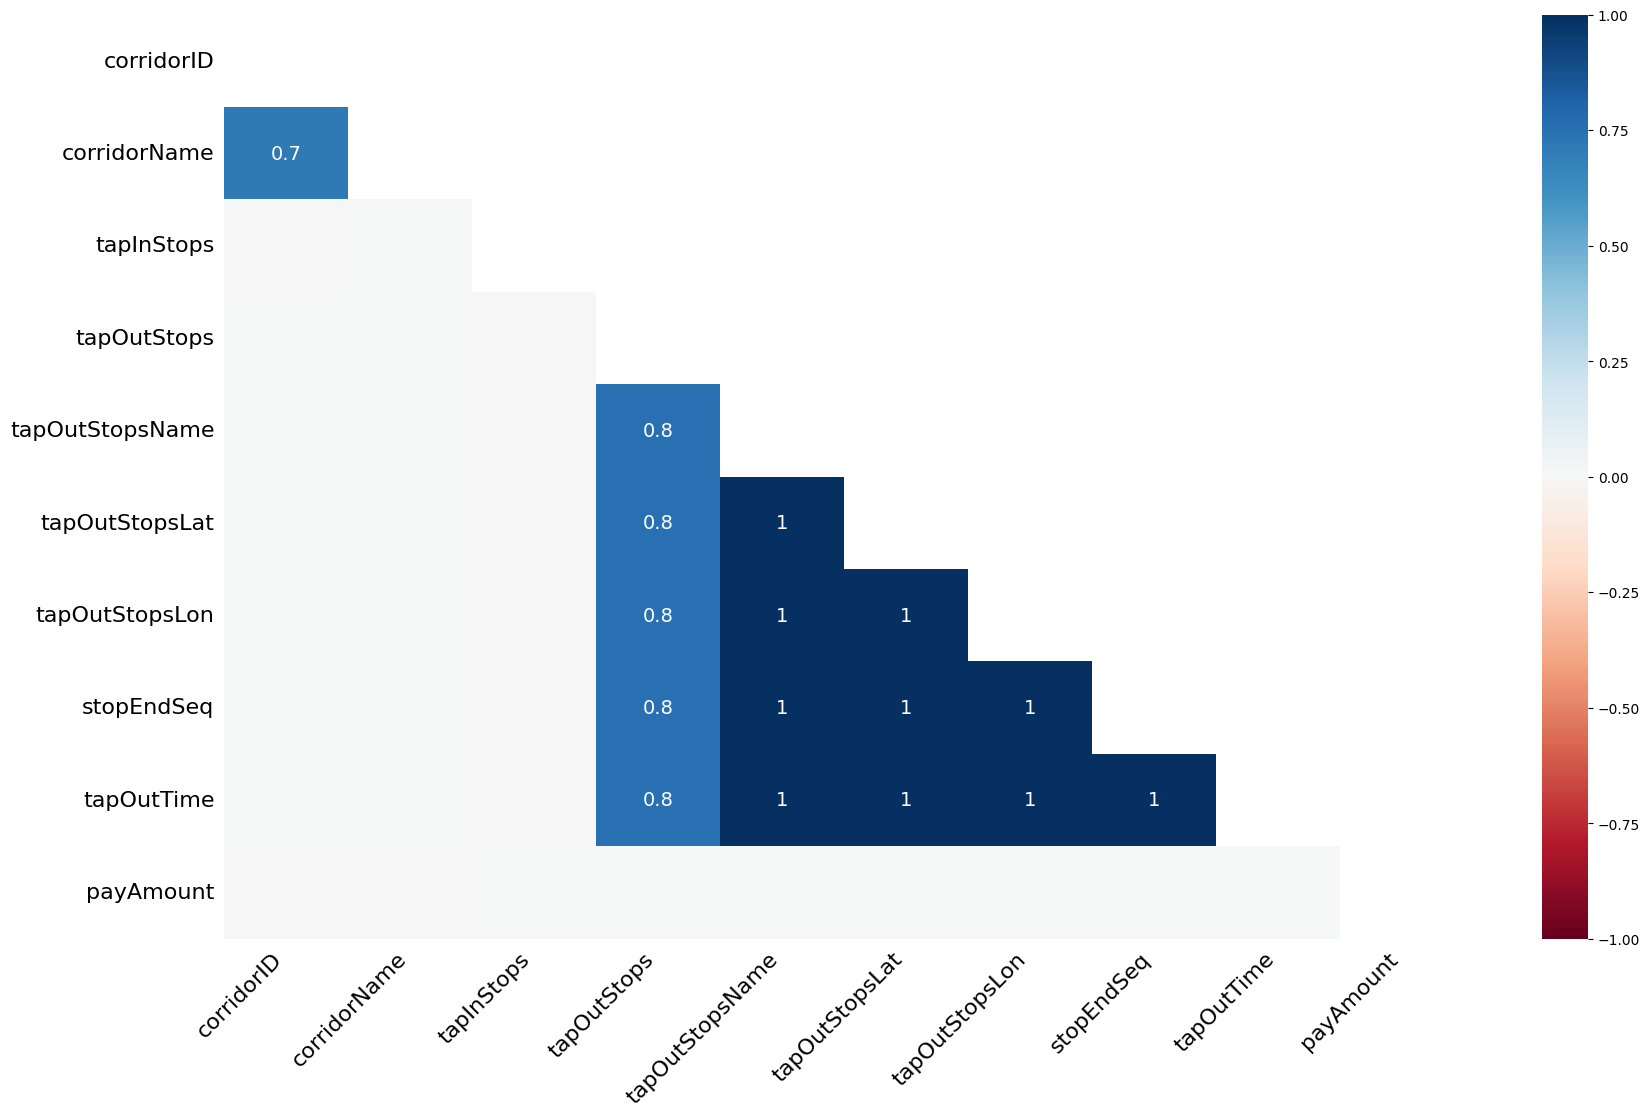

In [26]:
msno.heatmap(df[['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon',
'stopEndSeq', 'tapOutTime', 'payAmount']])

Berdasarkan heatmap di atas, diketahui bahwa:

* `corridorID` dan `corridorName`:
 Terdapat korelasi dalam sebaran data yang hilang antara dua kolom ini. Dapat disimpulkan jika suatu observasi kehilangan nilai pada kolom corridorID, kemungkinan besar nilai yang hilang juga akan terjadi di kolom corridorName, dan sebaliknya.

* `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, dan `tapOutTime`:
 Missing value kolom-kolom ini menunjukkan adanya korelasi. Dapat disimpulkan jika suatu observasi kehilangan nilai pada salah satu kolom ini, kemungkinan besar nilai yang hilang juga terjadi di kolom-kolom lainnya.

* `corridorName`, `tapInStops`, dan `payAmount`:
Beberapa missing value pada kolom-kolom ini tampaknya memiliki sebaran yang independen. Dengan kata lain, ketiga kolom ini tidak menunjukkan korelasi yang kuat dengan kolom-kolom lain dalam hal nilai yang hilang.

* **Dendogram**

[Dendrogram](https://en.wikipedia.org/wiki/Dendrogram) adalah cara untuk memvisualisasikan hubungan di antara variabel-variabel yang ada serta bagaimana klaster dibentuk. Dendrogram tidak memberi informasi tentang jarak absolut atau tingkat kesamaan dalam nilai numerik, tetapi dapat menunjukkan hubungan relatif antar variabel berdasarkan data yang dianalisis.

<Axes: >

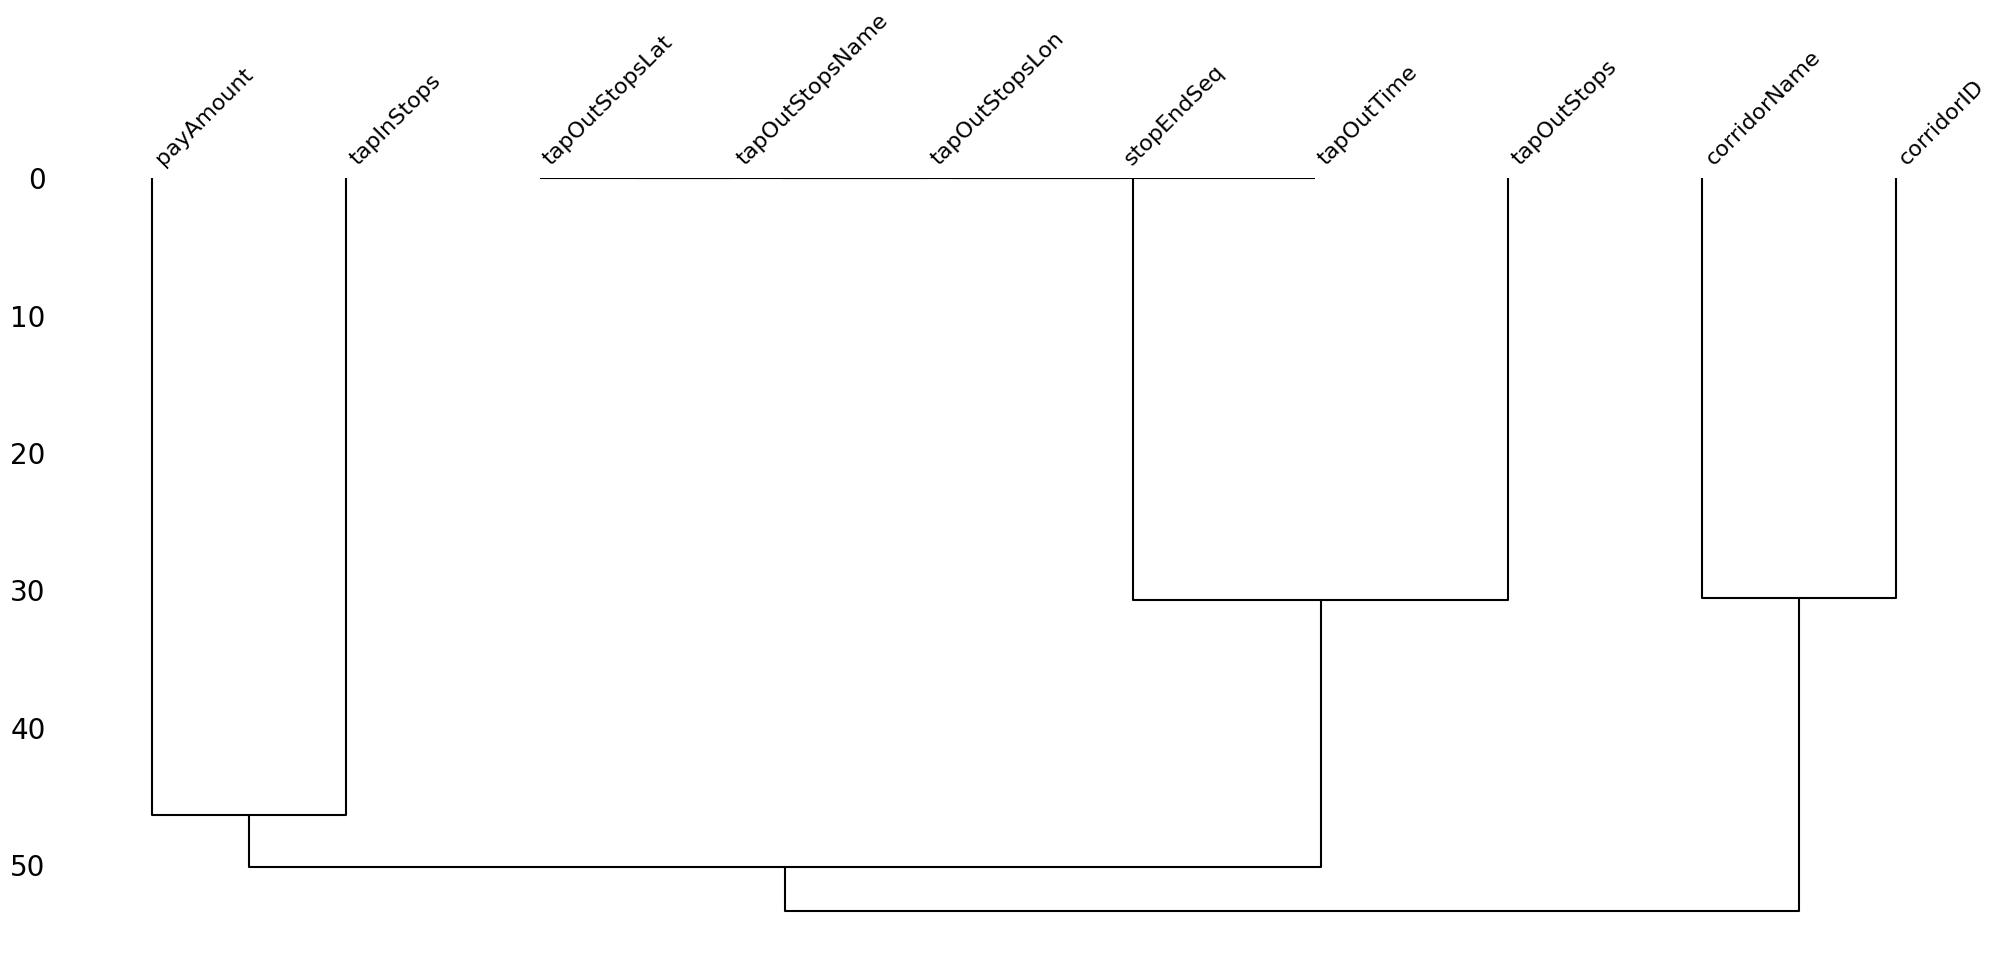

In [27]:
msno.dendrogram(df[['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon',
'stopEndSeq', 'tapOutTime', 'payAmount']])

Berdasarkan dendrogram di atas, diketahui bahwa:

* Pengelompokan `corridorName` dan `corridorID`: 
Hubungan yang dekat antara nama koridor dan ID koridor sangat masuk akal, karena ID biasanya adalah penanda unik yang diberikan untuk setiap nama koridor. Hubungan ini menunjukkan konsistensi data dan bahwa kedua variabel ini sangat bergantung satu sama lain dan dapat dianggap sebagai representasi yang hampir sama dalam konteks data.

* Pengelompokan `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, dan `tapOutTime`:
 Kolom-kolom ini menunjukkan hubungan yang sangat dekat antara waktu seseorang mengetuk keluar (tap out) dari sistem transportasi dengan lokasi pemberhentian tempat tap out dilakukan. Ini mengindikasikan bahwa waktu tap out bisa sangat spesifik terhadap lokasi tap out, atau bahwa data untuk waktu tap out mungkin telah diperoleh langsung dari data lokasi pemberhentian tap out (ID halte, nama halte, posisi latitude dan longitude, serta urutan dari halte tersebut).

* Pengelompokan `tapInStops` dan `payAmount`: 
Adanya keterkaitan antara kedua kolom ini dapat diketahui bahwa ketika kita melakukan Tap Masuk pada suatu halte kita sudah bisa mendapatkan data berapa besar jumlah yang harus dibayarkan pelanggan untuk menggunakan jasa transportasi TransJakarta. Akan tetapi kita juga harus mempertimbangkan kolom lain seperti koridor mana yang digunakan untuk mengetahui harga yang dipatok dari perjalanan tersebut.

## C.3d. Menghandle Missing Value

Setelah melakukan visualisasi terhadap anomali data secara kasar. Pada tahap ini kita akan menangani tiap-tiap anomali data secara jauh dengan cara:

- Mengisi data yang hilang pada setiap kolom ataupun menghapus missing value pada kolom.
- Memanfaatkan sisa missing value untuk keperluan depth analysis.
- Menggunakan *outlier* untuk memperdalam analisis.

**Mengisi ataupun Menghapus Missing Value**

####  `corridorID` dan `corridorName`

Untuk `corridorID` yang tidak ada `corridorName` dan sebaliknya, kita mencoba mengisinya berdasarkan pemetaan yang tersedia.

In [28]:
corridorNameToID = df.dropna(subset=['corridorID', 'corridorName']).drop_duplicates('corridorName').set_index('corridorName')['corridorID'].to_dict()
corridorIDtoName = df.dropna(subset=['corridorID', 'corridorName']).drop_duplicates('corridorID').set_index('corridorID')['corridorName'].to_dict()


df['corridorID'] = df.apply(lambda row: corridorNameToID.get(row['corridorName'], row['corridorID']) if pd.isnull(row['corridorID']) else row['corridorID'], axis=1)

df['corridorName'] = df.apply(lambda row: corridorIDtoName.get(row['corridorID'], row['corridorName']) if pd.isnull(row['corridorName']) else row['corridorName'], axis=1)

df[['corridorID', 'corridorName']].isnull().sum()

corridorID      1125
corridorName    1125
dtype: int64

Setelah melakukan imputasi nilai `corridorID` dan `corridorName`, ternyata masih tersisa masing-masing kolom sebanyak **1125 missing value**. 

Kemudian dilakukan pengisian missing value yang tersisa dengan memberikan keterangan 'Simulasi' dengan asumsi koridor tersebut adalah simulasi penyesuaian koridor baru yang dilakukan TransJakarta [[1]](https://transjakarta.co.id/transjakarta-lakukan-penyesuaian-terhadap-4-rute/), karena tidak ada kolom lain yang dapat digunakan untuk pemetaan atau mengisi kedua kolom tersebut.

In [29]:
df[['corridorID', 'corridorName']] = df[['corridorID', 'corridorName']].fillna('Simulasi')

#### ` tapInStops`

Mengingat kolom `tapInStop` memiliki missing value <5% dari total data (3.32%). Akan efektif apabila dilakukan penghapusan. Sebelumnya sudah dicoba dengan melakukan imputasi dengan mean, median,modus namun tidak ada perubahan  yang signifikan.

In [30]:
df.shape

(37900, 22)

In [31]:
df=df.dropna(subset=['tapInStops'])

In [32]:
df.shape

(36687, 22)

#### `tapOutStops` dan `tapOutStopsName`

Karena pada kolom `tapOutStops` persentase missing valuenya diatas 5% (6,04%) maka dilakukan pengisian data berdasarkan pemetaan yang tersedia, baik untuk kolom `tapOutStops` maupun `tapOutStopsName`.

In [33]:
# Membuat pemetaan dari 'tapOutStops' ke 'tapOutStopsName'
tapOutStopsToNameMapping = df.dropna(subset=['tapOutStops', 'tapOutStopsName']).drop_duplicates('tapOutStops').set_index('tapOutStops')['tapOutStopsName'].to_dict()

# Membuat pemetaan dari 'tapOutStopsName' ke 'tapOutStops'
tapOutStopsNameToIDMapping = df.dropna(subset=['tapOutStops', 'tapOutStopsName']).drop_duplicates('tapOutStopsName').set_index('tapOutStopsName')['tapOutStops'].to_dict()

# Mengisi missing 'tapOutStopsName' berdasarkan 'tapOutStops'
df['tapOutStopsName'] = df.apply(
    lambda row: tapOutStopsToNameMapping[row['tapOutStops']] if pd.isnull(row['tapOutStopsName']) and row['tapOutStops'] in tapOutStopsToNameMapping else row['tapOutStopsName'],
    axis=1
)

# Mengisi missing value 'tapOutStops' berdasarkan 'tapOutStopsName'
df['tapOutStops'] = df.apply(
    lambda row: tapOutStopsNameToIDMapping[row['tapOutStopsName']] if pd.isnull(row['tapOutStops']) and row['tapOutStopsName'] in tapOutStopsNameToIDMapping else row['tapOutStops'],
    axis=1
)

In [34]:
print("Missing value yang tersisa: ")
df[['tapOutStops', 'tapOutStopsName']].isna().sum()

Missing value yang tersisa: 


tapOutStops        1326
tapOutStopsName    1308
dtype: int64

Terdapat **selisih 18 baris data** antara `tapOutStops` dan `tapOutStopsName`, dimana baris tersebut terdapat missing value di kolom `tapOutStops` tetapi memiliki value `tapOutStopsaName`. Dari nilai unik yang ada, nama halte yang tertera merupakan nama jalan, gang, atau kelurahan yang merupakan halte-halte kecil. 

Untuk mengisi missing value tersebut, akan diberikan  keterangan 'No_ID' dengan asumsi halte-halte tersebut merupakan halte kecil dan baru sehingga belum atau bahkan tidak memiliki ID.

In [35]:
df.loc[(df['tapOutStops'].isna()) & (df['tapOutStopsName'].notna()), 'tapOutStopsName'].unique()

array(['Jln. H. Yahya', 'Sbr. Jl H Emuntipala I', 'Sbr. Ps. Pisang',
       'Exit Tol Veteran Bintaro', 'MIN 8 Srengseng Sawah',
       'Sbr. Persada Purnawira Halim', 'Grha Intirub', 'Jln. Timbul III',
       'SMAN 28', 'Griya Galaxy 126', 'Permata Eksekutif 2',
       'Jln. Siman Noar', 'Jln. Bungur Besar VI',
       'Sbr. Jln. Gading Griya Lestari', 'Kel. Cibubur',
       'Sekolah Tarsisius 2', 'Jln. Cempaka Putih Tengah XXVII',
       'Gg. Trijaya IV Tebet Timur'], dtype=object)

In [36]:
condition = df['tapOutStops'].isna() & df['tapOutStopsName'].notna()
df.loc[condition, 'tapOutStops'] = "No_ID"

#### `payAmount`

Missing value pada kolom `payAmount` sebesar 2,6% yang mana kurang dari 5%. Untuk menangani missing value tersebut dengan menghapusnya. Sebelumnya sudah dicoba dengan mengisi missing value dengan mean, median namun tidak ada perubahan maupun perubahan signifikan.

In [37]:

df=df.dropna(subset=['payAmount'])

In [38]:
df.shape

(35713, 22)

In [39]:
# Mengahpus baris yang masih kosong, selain kolom payamount

df = df[df.drop(columns='payAmount').notnull().all(axis=1)]

In [40]:
df.info

<bound method DataFrame.info of               transID            payCardID payCardBank  \
0      EIIW227B8L34VB  180062659848800      e-Money      
1      LGXO740D2N47GZ  4885331907664776     JakCard      
2      DJWR385V2U57TO  4996225095064169     JakCard      
3      JTUZ800U7C86EH  639099174703         Flazz        
4      VMLO535V7F95NJ  570928206772         Flazz        
...               ...           ...           ...        
37895  ZWEC949B8Q87QG  4685818286724028395  BRIzzi       
37896  YHHK837P6Y95GN  6502902290603767     JakCard      
37897  YXPP627N4G95HO  213159426675861      e-Money      
37898  RGVK175U2U98UV  377840859133591      e-Money      
37899  FMZZ963S4B68ZP  501862539795         Flazz        

                  payCardName payCardSex  payCardBirthDate corridorID  \
0      Bajragin Usada          M          2008              5           
1      Gandi Widodo            F          1997              6C          
2      Emong Wastuti           F          1992      

Setelah dilakunakn pembersihan, terjadi pengurangan dimana sebanyak 37.900 baris data sekarang berkurang menjadi 34.444 baris data.

### C.3e. Mendeteksi & Menghandle Outliers

Untuk pengecekan outlier, kita hanya memfokuskan pada tahun kelahiran dimana akan mengidentifikasihan usia dan kelompok usia. Hal tersebut dikarenakan variabel numerik lainnya tidak memiliki karakteristik pasti seperti latitude, longitude yang mengidentifikasikan lokasi dan payCardAmount yang sudah ditentukan biaya perjalanannya .

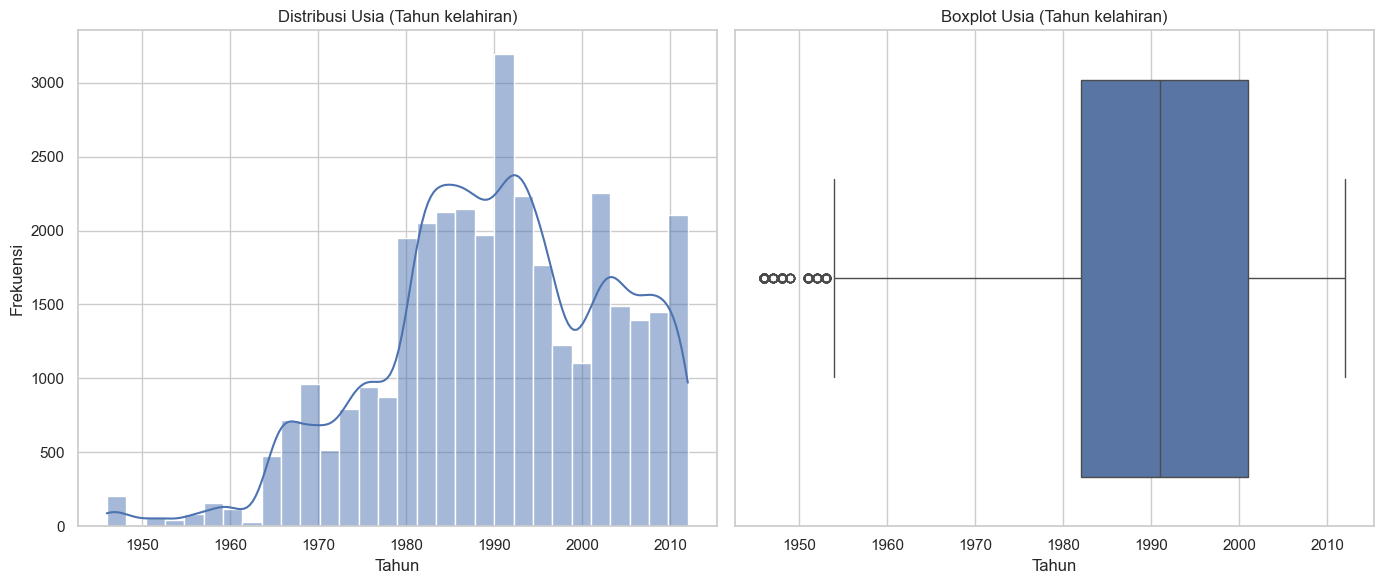

In [43]:
# Setting up the aesthetics for plots
sns.set(style="whitegrid")

# Creating a figure to hold our subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for Age Distribution
sns.histplot(df['payCardBirthDate'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribusi Usia (Tahun kelahiran)')
axes[0].set_xlabel('Tahun')
axes[0].set_ylabel('Frekuensi')

# Boxplot for Age to visualize outliers
sns.boxplot(x=df['payCardBirthDate'], ax=axes[1])
axes[1].set_title('Boxplot Usia (Tahun kelahiran)')
axes[1].set_xlabel('Tahun')

plt.tight_layout()
plt.show()

Menampilkan Boxplot

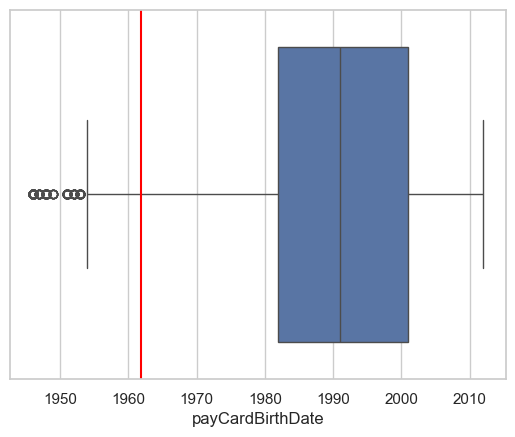

In [44]:
sns.boxplot(x='payCardBirthDate',data=df)
plt.axvline(df['payCardBirthDate'].quantile(0.25) - ((19/18) * (df['payCardBirthDate'].quantile(0.75)-df['payCardBirthDate'].quantile(0.25))), color='red')
plt.show()

Menampilkan data yang akan di delete.

In [45]:
year_birth_delete=df['payCardBirthDate']<1960
df[year_birth_delete]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
80,LFIW578V8Y12XO,2237440645700724,JakCard,Latika Sirait,M,1953,10D,Kampung Rambutan - Tanjung Priok,Pulang,P00036,Cempaka Putih,-6.174207,106.87642,9,2023-04-03 06:03:33,P00182,Plumpang Pertamina Arah Utara,-6.128480,106.89370,13.0,2023-04-03 06:28:37,3500.0
99,SVRH922T8G79FY,213104805015669,e-Money,"Sutan Garda Tampubolon, S.Pd",M,1956,JAK.49,Lebak Bulus - Cipulir,Pergi,B01790P,JPO Timur Pondok Indah 1,-6.287054,106.77989,48,2023-04-03 05:59:21,B05492P,St. MRT Lebak Bulus,-6.289421,106.77436,49.0,2023-04-03 06:53:50,0.0
152,FZGD727V6X43JZ,3507107976417837,JakCard,Gatra Rahayu,M,1946,6V,Ragunan - Gelora Bung Karno,Pergi,P00053,Duren Tiga,-6.252377,106.82697,8,2023-04-03 05:14:27,P00133,Masjid Agung,-6.236483,106.79845,13.0,2023-04-03 05:49:04,3500.0
261,QHMH875Y6Q27UT,630465586752,Flazz,Winda Puspita,M,1959,6Q,Dukuh Atas - Casablanca via Epicentrum Raya,Pergi,B05739P,The Wave,-6.214587,106.83642,7,2023-04-03 05:05:31,B03396P,Kota Kasablanka,-6.224688,106.84246,11.0,2023-04-03 05:49:28,3500.0
380,TDRW354U5T23OZ,2237440645700724,JakCard,Latika Sirait,M,1953,10D,Kampung Rambutan - Tanjung Priok,Pergi,P00247,Tanah Merdeka Arah Timur,-6.307866,106.87389,16,2023-04-03 16:48:37,P00101,Kampung Rambutan,-6.309885,106.88216,17.0,2023-04-03 17:44:08,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37460,JCJX944F8S69OK,6502937248567987,JakCard,Gandi Kusmawati,M,1947,M12,Sunter Boulevard Barat - Penjaringan,Pergi,P00046,Danau Agung,-6.146869,106.85805,4,2023-04-19 19:10:30,P00114,Kemayoran Landas Pacu Timur,-6.152181,106.85424,5.0,2023-04-19 20:10:26,3500.0
37548,KMMI085D2F73WH,6547155617203954,JakCard,drg. Artawan Sitorus,M,1952,5N,Kampung Melayu - Ragunan,Pulang,B05686P,Tebet Barat Dalam,-6.239317,106.84535,47,2023-04-19 19:38:42,B05186P,Simpang Tebet Barat Raya,-6.230120,106.85121,54.0,2023-04-19 20:59:49,3500.0
37612,PFIU447H6E52PH,38951481647360,TapCash,Karma Wacana,M,1951,JAK.41,Kampung Melayu - Pulo Gadung,Pergi,B01502P,Jln. Pisangan Lama I,-6.214711,106.87500,13,2023-04-16 11:16:46,B01219P,Jln. Kayu Putih Selatan III,-6.187972,106.89525,40.0,2023-04-16 13:21:08,0.0
37754,YJQR743W5W22II,6551773153088424,JakCard,Ellis Prasetya,F,1952,JAK.18,Kalibata - Kuningan,Pergi,B03462P,Sbr. BPJS Jaksel,-6.249724,106.84327,9,2023-04-25 11:12:14,B04551P,Sbr. TK Aisyiyah 4 Tebet Timur,-6.231061,106.85259,21.0,2023-04-25 11:42:03,0.0


Menampilkan persentase data yang akan di delete.

In [46]:
print('Data payCardBirthDate yang akan dihapus (%):',(len(df[year_birth_delete])/df.shape[0])*100)

Data payCardBirthDate yang akan dihapus (%): 1.617117640227616


Insight data:

- Berdasarkan visualisasi ini, individu dengan tahun kelahiran di bawah 1948 atau jika dikaitkan dengan usia tahun dataset diambil (2023), usia di atas 70 tahun dapat dianggap sebagai outlier karena mereka berada di luar rentang usia khas bagi sebagian besar pengguna transportasi umum.

- Keberadaan outlier ini menunjukkan bahwa ada beberapa pengguna yang sangat lanjut usia menggunakan layanan ini, yang mungkin jarang terjadi.

- Kemudian ditemukan juga ada 1 data yang NaN, berdasarkan aktivitas terakhir terlihat bahwa berstatus **pergi**, ada kemungkinan terjadi eror saat tap, kartu hilang, maupun tidak melakukan tapout sehingga terdeteksi outlier. Sehingga kita akan melakukan **Listwise Deletion** atau **menghapus baris** yang mengandung data outlier pada kolom `payCardBirthDate`.

### Delete Outlier

In [47]:
outliers_delete = df[((year_birth_delete))]
outliers_delete

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
80,LFIW578V8Y12XO,2237440645700724,JakCard,Latika Sirait,M,1953,10D,Kampung Rambutan - Tanjung Priok,Pulang,P00036,Cempaka Putih,-6.174207,106.87642,9,2023-04-03 06:03:33,P00182,Plumpang Pertamina Arah Utara,-6.128480,106.89370,13.0,2023-04-03 06:28:37,3500.0
99,SVRH922T8G79FY,213104805015669,e-Money,"Sutan Garda Tampubolon, S.Pd",M,1956,JAK.49,Lebak Bulus - Cipulir,Pergi,B01790P,JPO Timur Pondok Indah 1,-6.287054,106.77989,48,2023-04-03 05:59:21,B05492P,St. MRT Lebak Bulus,-6.289421,106.77436,49.0,2023-04-03 06:53:50,0.0
152,FZGD727V6X43JZ,3507107976417837,JakCard,Gatra Rahayu,M,1946,6V,Ragunan - Gelora Bung Karno,Pergi,P00053,Duren Tiga,-6.252377,106.82697,8,2023-04-03 05:14:27,P00133,Masjid Agung,-6.236483,106.79845,13.0,2023-04-03 05:49:04,3500.0
261,QHMH875Y6Q27UT,630465586752,Flazz,Winda Puspita,M,1959,6Q,Dukuh Atas - Casablanca via Epicentrum Raya,Pergi,B05739P,The Wave,-6.214587,106.83642,7,2023-04-03 05:05:31,B03396P,Kota Kasablanka,-6.224688,106.84246,11.0,2023-04-03 05:49:28,3500.0
380,TDRW354U5T23OZ,2237440645700724,JakCard,Latika Sirait,M,1953,10D,Kampung Rambutan - Tanjung Priok,Pergi,P00247,Tanah Merdeka Arah Timur,-6.307866,106.87389,16,2023-04-03 16:48:37,P00101,Kampung Rambutan,-6.309885,106.88216,17.0,2023-04-03 17:44:08,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37460,JCJX944F8S69OK,6502937248567987,JakCard,Gandi Kusmawati,M,1947,M12,Sunter Boulevard Barat - Penjaringan,Pergi,P00046,Danau Agung,-6.146869,106.85805,4,2023-04-19 19:10:30,P00114,Kemayoran Landas Pacu Timur,-6.152181,106.85424,5.0,2023-04-19 20:10:26,3500.0
37548,KMMI085D2F73WH,6547155617203954,JakCard,drg. Artawan Sitorus,M,1952,5N,Kampung Melayu - Ragunan,Pulang,B05686P,Tebet Barat Dalam,-6.239317,106.84535,47,2023-04-19 19:38:42,B05186P,Simpang Tebet Barat Raya,-6.230120,106.85121,54.0,2023-04-19 20:59:49,3500.0
37612,PFIU447H6E52PH,38951481647360,TapCash,Karma Wacana,M,1951,JAK.41,Kampung Melayu - Pulo Gadung,Pergi,B01502P,Jln. Pisangan Lama I,-6.214711,106.87500,13,2023-04-16 11:16:46,B01219P,Jln. Kayu Putih Selatan III,-6.187972,106.89525,40.0,2023-04-16 13:21:08,0.0
37754,YJQR743W5W22II,6551773153088424,JakCard,Ellis Prasetya,F,1952,JAK.18,Kalibata - Kuningan,Pergi,B03462P,Sbr. BPJS Jaksel,-6.249724,106.84327,9,2023-04-25 11:12:14,B04551P,Sbr. TK Aisyiyah 4 Tebet Timur,-6.231061,106.85259,21.0,2023-04-25 11:42:03,0.0


In [48]:
df.shape

(34444, 22)

In [49]:
df.drop(outliers_delete.index,inplace=True)

In [50]:
df.shape

(33887, 22)

### Menambah Kolom Baru

1. `tapInHour` dan `tapOutHour`

In [51]:
df['tapInHour'] = df['tapInTime'].dt.hour
df['tapOutHour'] = df['tapOutTime'].dt.hour
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour
0,EIIW227B8L34VB,180062659848800,e-Money,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,Pulang,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6
1,LGXO740D2N47GZ,4885331907664776,JakCard,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Pergi,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,5,6
2,DJWR385V2U57TO,4996225095064169,JakCard,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,Pergi,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,5,6
3,JTUZ800U7C86EH,639099174703,Flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Pergi,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,5,6
4,VMLO535V7F95NJ,570928206772,Flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,Pergi,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,BRIzzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,Pulang,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,18,19
37896,YHHK837P6Y95GN,6502902290603767,JakCard,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,Pulang,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,21,22
37897,YXPP627N4G95HO,213159426675861,e-Money,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,Pulang,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,10,13
37898,RGVK175U2U98UV,377840859133591,e-Money,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,Pulang,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,19,20


2. `tapInDay` dan `tapOutDay`

In [52]:
df['tapInDay'] = df['tapInTime'].dt.dayofweek
df['tapOutDay'] = df['tapOutTime'].dt.dayofweek
tapOnDay = {
    0: 'Senin',
    1: 'Selasa',
    2: 'Rabu',
    3: 'Kamis',
    4: 'Jumat',
    5: 'Sabtu',
    6: 'Minggu'
}
df['tapInDay'] = df['tapInDay'].map(tapOnDay)
df['tapOutDay'] = df['tapOutDay'].map(tapOnDay)
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDay,tapOutDay
0,EIIW227B8L34VB,180062659848800,e-Money,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,Pulang,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,Senin,Senin
1,LGXO740D2N47GZ,4885331907664776,JakCard,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Pergi,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,5,6,Senin,Senin
2,DJWR385V2U57TO,4996225095064169,JakCard,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,Pergi,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,5,6,Senin,Senin
3,JTUZ800U7C86EH,639099174703,Flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Pergi,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,5,6,Senin,Senin
4,VMLO535V7F95NJ,570928206772,Flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,Pergi,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,6,6,Senin,Senin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,BRIzzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,Pulang,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,18,19,Jumat,Jumat
37896,YHHK837P6Y95GN,6502902290603767,JakCard,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,Pulang,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,21,22,Selasa,Selasa
37897,YXPP627N4G95HO,213159426675861,e-Money,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,Pulang,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,10,13,Selasa,Selasa
37898,RGVK175U2U98UV,377840859133591,e-Money,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,Pulang,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,19,20,Sabtu,Sabtu


3. `age` dan `ageGroup`

    Untuk mendapatkan usia kita melakukan selisih terhadap tahun 2023 yaitu pada dataset didapatkan terhadap tahun kelahiran pelanggan. Setelah itu mengelompokkan berdasarkan usianya.

In [53]:
df['age'] = 2023 - df['payCardBirthDate']

def ageCategory(age):
    if 0 <= age <= 12:
        return '0-12'
    elif 13 <= age <= 19:
        return '13-19'
    elif 20 <= age <= 39:
        return '20-39'
    elif 40 <= age <= 59:
        return '40-59'
    else:
        return 'Lansia'

df['ageGroup'] = df['age'].apply(ageCategory)

df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDay,tapOutDay,age,ageGroup
0,EIIW227B8L34VB,180062659848800,e-Money,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,Pulang,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,Senin,Senin,15,13-19
1,LGXO740D2N47GZ,4885331907664776,JakCard,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Pergi,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,5,6,Senin,Senin,26,20-39
2,DJWR385V2U57TO,4996225095064169,JakCard,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,Pergi,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,5,6,Senin,Senin,31,20-39
3,JTUZ800U7C86EH,639099174703,Flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Pergi,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,5,6,Senin,Senin,45,40-59
4,VMLO535V7F95NJ,570928206772,Flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,Pergi,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,6,6,Senin,Senin,41,40-59


<hr>

## **C.4 Clean Data**

Data sudah bersih, mari kita lihat kembali informasinya:


In [54]:
list_item = []
for col in df.columns:
    list_item.append([col,df[col].nunique(),df[col].unique()])

tabel_desc = pd.DataFrame(columns=['Column Name','Num of Unique','Unique Data'],data=list_item)

In [55]:
pd.set_option('display.max_colwidth',1)
tabel_desc

,Column Name,Num of Unique,Unique Data
0,transID,33887,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, WTBE175B2A58NC, WNJA365V4N56HF, SLHT241M5V31BZ, CUBV879R6E17WU, SFFW927I8N52GM, NZOZ563E7A86QX, XTVN886V6A58RC, BNNJ428H8B05IR, LDMO585I7Y51LA, CILM584S6W21DC, WWNB500S1E66DW, ...]"
1,payCardID,1912,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 4097122165824, 378851219912235, 180022972730457, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 4963710913075879668, 342875882384375, 4909284437358495207, 2267435685058176, 4613366061817460310, 4664503638851963221, 341371220559499, 30276672399789, 3549191016294752, 2679374058097150, 4104888875282062619, ...]"
2,payCardBank,6,"[e-Money, JakCard, Flazz, Gopay, BRIzzi, TapCash]"
3,payCardName,1905,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana, S.H., Tgk. Ilsa Farida, Drs. Nadia Rama

In [56]:
print('jumlah(baris,kolom):',df.shape)

jumlah(baris,kolom): (33887, 28)


Berdasarkan hasil pembersihan data, mulanya dataset transjakarta memiliki 37.900 baris data, kemudian diolah menjadi 34.444 baris data. Sekarang data telah tersaring kembali menjadi 33.887 baris data, setelah dilakukan penghapusan outlier pada kolom `payCardBirthDate`.

<hr>

## **C.5 Explratory Data Analysis (EDA)**

Kita telah melakukan Data Understanding and Cleaning. Berikutnya data ini akan digunakan untuk mencoba menjawab business problem yang terlah dirumuskan sebelumnya. Yaitu:


 - Bagaimana pola penggunaan layanan Transjakarta oleh penumpang berdasarkan waktu dan lokasi?
 - Seperti apa profil demografis yang mendominasi pengguna Tansjakarta?
 - Bagaimana analisis metode pembayaran dapat membantu memetakan perilaku konsumen?
 - Apa rekomendasi strategis yang dapat diberikan untuk meningkatkan layanan, kenyamanan, dan efisiensi operasional Transjakarta?


### C.5a. Behavioral pattern analysis

##### **Halte yang memiliki kepadatan penumpang tertinggi**

In [57]:
haltePrefer = df['tapOutStopsName'].value_counts().reset_index()
haltePrefer.columns = ['Nama Halte', 'Jumlah']
topHalteOut = haltePrefer.sort_values(by='Jumlah', ascending=False).head(10)
topHalteOut

,Nama Halte,Jumlah
0,BKN,306
1,Penjaringan,253
2,Term. Senen,191
4,Monas,158
3,Term. Kampung Rambutan,158
5,Pinang Ranti,143
6,Ragunan,128
7,Cibubur Junction,127
8,Kejaksaan Agung,126
9,Pluit,125


Berdasarkan tabel, diketahu bahwa halte BKN menjadi halte terpadat (306) sepanjang rute perjalanan, disusul dengan halte penjaringan sebanyak 253.

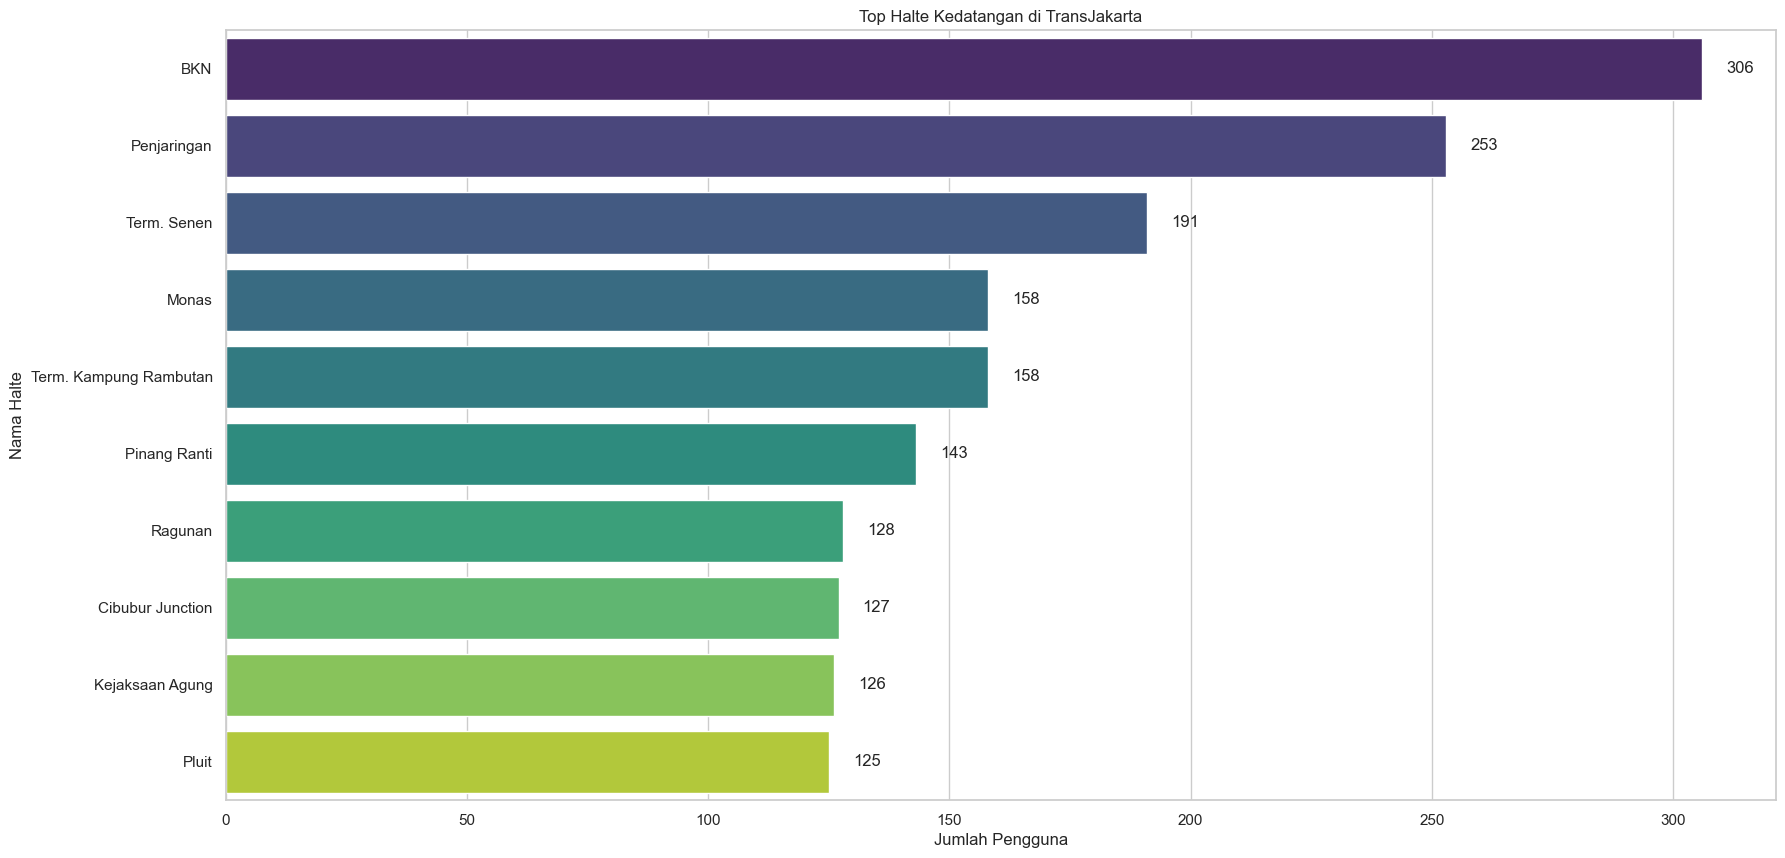

In [58]:
# Visualisasi data untuk Top 10 Halte Tap Out
plt.figure(figsize=(20, 10))
barplot = sns.barplot(x='Jumlah', y='Nama Halte', data=topHalteOut, palette='viridis')
plt.title('Top Halte Kedatangan di TransJakarta')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Nama Halte')

# Menambahkan anotasi jumlah pada tiap bar
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 5,  # menambahkan sedikit ruang dari ujung bar
             p.get_y() + p.get_height() / 2,  # posisi y pada tengah bar
             f'{int(width)}',  # nilai yang akan ditampilkan
             va='center')

plt.show()

* Dari grafik 'Top Halte Kedatangan di Transjakarta' dapat disimpulkan halte BKN mendominasi sebagai halte terpadat, mengindikasikan bahwa ini adalah titik kritikal dalam jaringan transportasi publik yang mungkin menjadi pusat kegiatan ekonomi atau sosial. Keberadaan halte Penjaringan dan Terminal Senen di posisi berikutnya menegaskan pentingnya halte-halte ini sebagai hub transit atau titik koneksi dengan layanan transportasi lain. Konsistensi trafik di halte Monas dan Terminal Kampung Rambutan menggarisbawahi relevansi mereka dalam sistem TransJakarta. Observasi ini memberikan kesempatan bagi TransJakarta untuk mengevaluasi dan mengoptimalkan layanan di halte-halte dengan trafik tinggi ini, terutama dalam konteks meningkatkan infrastruktur tap out dan manajemen antrian untuk meningkatkan kepuasan pengguna. Kesimpulan dari data ini dapat memandu TransJakarta dalam pengambilan keputusan strategis untuk peningkatan layanan dan penyesuaian dengan kebutuhan pengguna yang dinamis.

#### Seberapa sering pengguna menggunakan koridor yang sama

In [59]:
def mode_ratio(g, col):
    mode = g[col].mode()
    if len(mode)>0:
        return (g[col]==mode[0]).mean()
    else:
        return np.nan

ratios = df.groupby('payCardName').apply(lambda g: mode_ratio(g, 'corridorID'))
print(ratios.describe())

count    1905.000000
mean     0.731613   
std      0.332380   
min      0.250000   
25%      0.333333   
50%      0.948718   
75%      1.000000   
max      1.000000   
dtype: float64


In [60]:
# Cek pola: apakah user konsisten naik di koridor sama

def mode_ratio(group, col):
    mode = group[col].mode()
    if len(mode)>0:
        return (group[col]==mode[0]).mean()
    else:
        return np.nan

cols_to_check = ['corridorID','corridorName','direction','tapInStops','tapOutStops']

summary = {}
for col in cols_to_check:
    ratios = df.groupby('payCardName').apply(lambda g: mode_ratio(g, col))
    summary[col] = {
        'avg_mode_ratio': ratios.mean(),
        'median_mode_ratio': ratios.median(),
        'min': ratios.min(),
        'max': ratios.max()
    }
summary_df = pd.DataFrame(summary).T
print(summary_df)

              avg_mode_ratio  median_mode_ratio   min  max
corridorID    0.731613        0.948718           0.25  1.0
corridorName  0.731627        0.948718           0.25  1.0
direction     0.653524        0.529412           0.50  1.0
tapInStops    0.507554        0.500000           0.25  1.0
tapOutStops   0.504076        0.500000           0.25  1.0


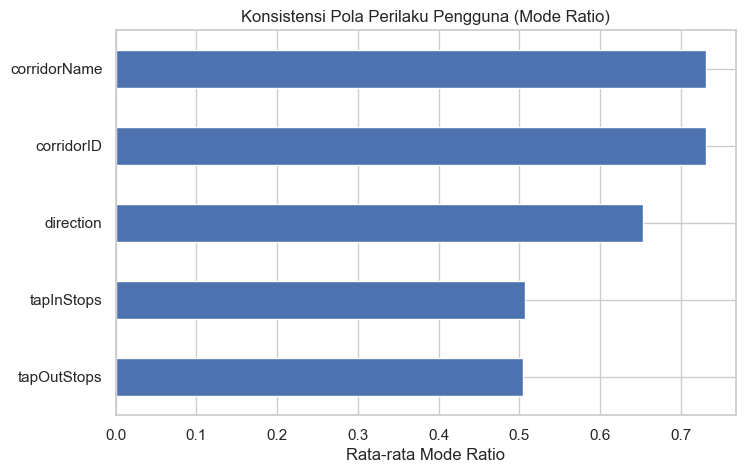

In [61]:
# Visual: rata-rata mode ratio per kolom

summary_df['avg_mode_ratio'].sort_values().plot(kind='barh', figsize=(8,5))
plt.title('Konsistensi Pola Perilaku Pengguna (Mode Ratio)')
plt.xlabel('Rata-rata Mode Ratio')
plt.show()

Insight data:

Berdasarkan data diatas, diketahui bahwa mayoritas pengguna konsiten menggunakan koridor yang sama. Hal ini ditandai dengan Kolom `corridorID` dan `corridorName` memiliki nilai yang tinggi (avg=0.731613 med= 0.948718). Arah perjalanan `direction` memiliki variasi sedang. Lokasi naik-turun penumpang sangat bervariasi, menandakan tingkat mobilitas yang tersebar di berbagai halte, bukan terfokus pada titik tertentu saja.

### Jam sibuk setiap Top 3 koridor

Sebagai perwakilan, kita akan menggunakan 3 koridor tersibuk untuk merepresentasikan setiap halte.

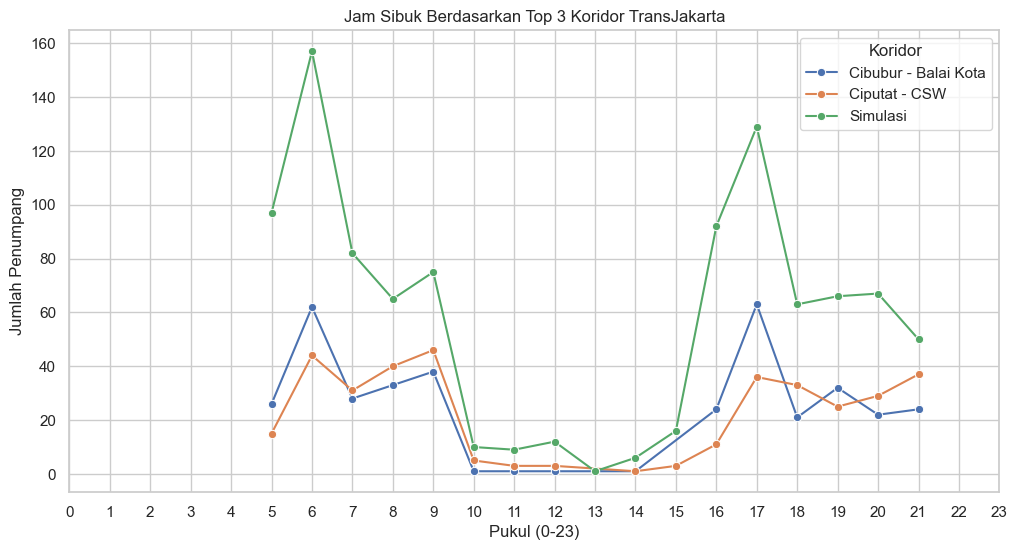

In [62]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'], errors='coerce')

# jam dari tap in
df['hour'] = df['tapInTime'].dt.hour

# Agregasi jumlah penumpang per jam per koridor
koridor_hour = df.groupby(['corridorName', 'hour']).size().reset_index(name='count')

# Top 3 koridor paling sibuk 
top_corridors = koridor_hour.groupby('corridorName')['count'].sum().sort_values(ascending=False).head(3).index
koridor_hour_top = koridor_hour[koridor_hour['corridorName'].isin(top_corridors)]

# Plot lineplot
plt.figure(figsize=(12,6))
sns.lineplot(data=koridor_hour_top, x='hour', y='count', hue='corridorName', marker='o')

plt.title('Jam Sibuk Berdasarkan Top 3 Koridor TransJakarta')
plt.xlabel('Pukul (0-23)')
plt.ylabel('Jumlah Penumpang')
plt.xticks(range(0,24))
plt.legend(title='Koridor')
plt.grid(True)

plt.show()


Berdasarkan lineplot diatas, dapat diketahui untuk jam sibuk 3 halte tersibuk ada pada jam 6 pagi dimana ini merupakan jam berangkat kantor. dan kembali memuncak pada jam 5 sore dimana dalam hal ini termasuk dalam jam pulang kantor. Berdasarkan jam serta rute koridor paling populer yaitu cibubur-balai kota kita bisa mengasumsikan hari sibuk ada pada [hari kerja](https://peraturan.bpk.go.id/Details/247257/perpres-no-21-tahun-2023) (senin-jumat).

## C.5b.Demografis Pengguna

### Distribusi Gender Pengguna Transjakarta

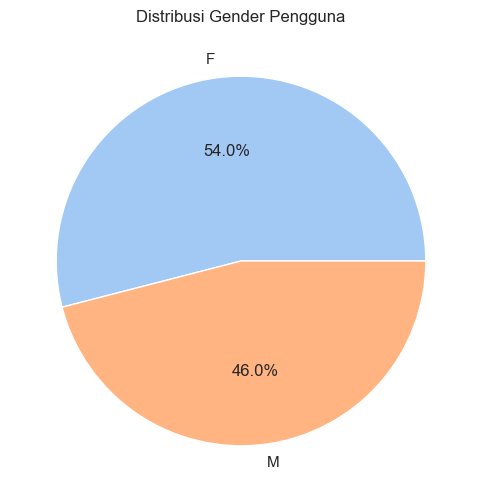

In [63]:
# Hitung jumlah pengguna per gender
gender_count = df['payCardSex'].value_counts().reset_index()
gender_count.columns = ['Gender', 'Count']

# Visualisasi pie chart
plt.figure(figsize=(6,6))
plt.pie(gender_count['Count'], labels=gender_count['Gender'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribusi Gender Pengguna')
plt.show()


Berdasarkan hasil visualisasi piechart, diketahui bahwa pengguna jasa Transjakarta didominasi oleh wanita yang disimbolkan dengan (F) sebanyak 54% dari jumlah pengguna.

### Segmentasi Pengguna Loyal dan Dinamis

Dalam segmen  ini, kita akan membagi pengguna layanan menjadi 2 kategorial yaitu pengguna loyal dan dinamis. Adapun penjelasannya sebagai berikut:

**Pengguna Loyal**: 
Dapat diasumsikan pengguna yang naik koridor/halte yang sama secara konsisten dengan pola perjalanan stabil. Misalnya pada setiap hari kerja dari rumah ke kantor melalui halte dan koridor yang sama.

**Pengguna Dinamis**:
Dapat diasumsikan pengguna yang sering berpindah koridor, halte, atau waktu perjalanan. Bisa karena rute fleksibel, jadwal tidak menentu, atau adanya kombinasi transportasi lain. Datanya lebih “acak” karena halte/korridor dan jam yang dipakai variatif.

### Pengguna Loyal vs Dinamis

In [64]:
# Segmentasi loyal vs dinamis
df_user = pd.DataFrame({'mode_ratio': ratios})
df_user['segment'] = np.where(df_user['mode_ratio']>=0.7, 'Loyal', 'Dinamis')
df_user

,mode_ratio,segment
payCardName,,
Ade Astuti,0.512821,Dinamis
Ade Halimah,0.411765,Dinamis
Ade Suryono,0.250000,Dinamis
Ade Waluyo,0.333333,Dinamis
Adhiarja Lazuardi,0.333333,Dinamis
...,...,...
drg. Tantri Situmorang,0.526316,Dinamis
"drg. Usyi Halimah, S.E.",0.526316,Dinamis
"drg. Yuni Yolanda, M.Ak",0.250000,Dinamis


### Proporsi Pengguna Loyal vs Dinamis

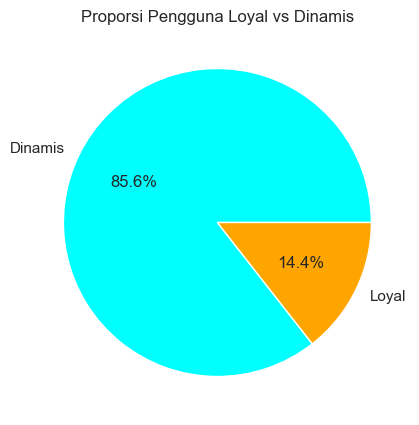

In [65]:
seg_count = df_user['segment'].value_counts(normalize=True)
plt.figure(figsize=(5,5))
plt.pie(seg_count, labels=seg_count.index, autopct='%1.1f%%', colors=['cyan','orange'])
plt.title('Proporsi Pengguna Loyal vs Dinamis')

plt.show()

Berdasarkan pie chart proporsi pengguna layanan Transjakarta, diketahui bahwa mayoritas 85.6% pengguna Transjakarta sering berpindah koridor atau halte, yang mana dalam hal ini masuk ke dalam kategori dinamis.

### Segmentasi Umur Pengguna Dinamis vs Loyal

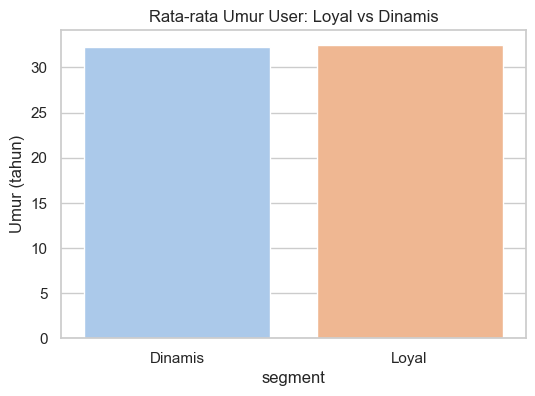

In [66]:
# Join umur
df_user = df_user.join(df.groupby('payCardName')['age'].mean())

# Visualisasi
plt.figure(figsize=(6,4))
sns.barplot(x=df_user.groupby('segment')['age'].mean().index, 
            y=df_user.groupby('segment')['age'].mean().values, palette='pastel')
plt.title('Rata-rata Umur User: Loyal vs Dinamis')
plt.ylabel('Umur (tahun)')
plt.show()


Berdasarkan rata-rata umur pengguna layanan, dapat kita lihat bahwa keduanya memiliki rata rata yang hampir sama dimana pengguna rata rata berusia >30 tahun (20-39 tahun), yang mana termasuk dalam kelompok usia usia dewasa-produktif. [Usia produktif](https://www.halodoc.com/artikel/usia-produktif-rentang-usia-dan-pengaruhnya?srsltid=AfmBOorZOUUrmUVlDK_Lz2ow0_NGPre8h5wIACT1vkJE2q4_ijvhGWub) merujuk pada rentang usia ketika individu dianggap mampu menghasilkan barang dan jasa, serta berkontribusi pada perekonomian. Menurut [Kemenkes](https://ayosehat.kemkes.go.id/kategori-usia/dewasa), didefinisikan bahwa usia produktif berada pada rentang usia 15–64 tahun.

## C.5c. Analisis Metode Pembayaran Terhadap Perilaku Pengguna

Dalam analisis ini kita akan mencaritahu metode pembayaran yang sering digunakan oleh pengguna untuk memetakan perilaku pengguna.

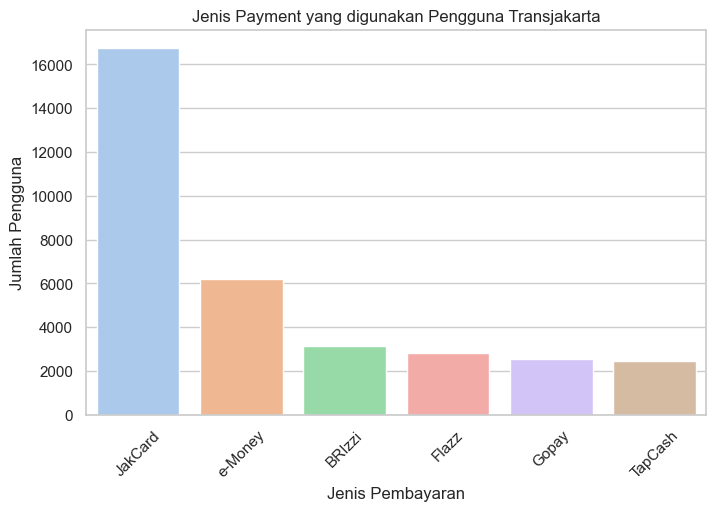

Jenis kartu yang paling banyak digunakan adalah: JakCard


In [67]:
# Hitung jumlah pengguna per jenis kartu
card_count = df['payCardBank'].value_counts().reset_index()
card_count.columns = ['payCardBank', 'payCardID']

# Visualisasi barplot
plt.figure(figsize=(8,5))
sns.barplot(data=card_count, x='payCardBank', y='payCardID', palette='pastel')
plt.title('Jenis Payment yang digunakan Pengguna Transjakarta')
plt.xlabel('Jenis Pembayaran')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45)
plt.show()

# Cetak jenis kartu yang paling dominan
print("Jenis kartu yang paling banyak digunakan adalah:", card_count.iloc[0,0])


Setelah diketahui bahwa pengguna Jackard paling banyak, mari kita caritahu perilaku pengguna pembayaran mayoritas yaitu JakCard dengan jumlah pengguna lebih dari 16.000 orang.

### Distribusi Umur Pengguna JakCard

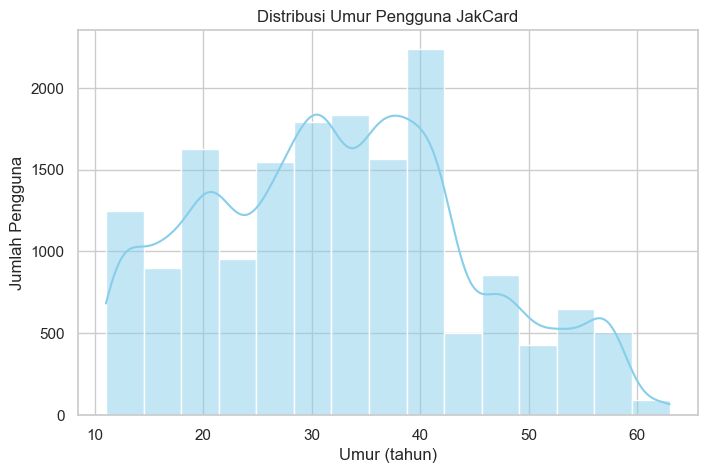

In [68]:
# Filter JakCard
jakcard_df = df[df['payCardBank'] == 'JakCard']

plt.figure(figsize=(8,5))
sns.histplot(jakcard_df['age'], bins=15, kde=True, color='skyblue')
plt.title('Distribusi Umur Pengguna JakCard')
plt.xlabel('Umur (tahun)')
plt.ylabel('Jumlah Pengguna')

plt.show()


Berdasarkan histogram diatas, diketahui bahwa pengguna Jakcard paling banyak didominasi orang yang berusia 40 tahun dengan jumlah pengguna lebih dari 2000 orang. Berdasarkan data, diketahui bahwa pengguna yang berusia 40 tahun pada tahun 2023 termasuk dalam [generasi milenial](https://www.detik.com/edu/detikpedia/d-6737366/7-nama-generasi-berdasarkan-umur-kamu-yang-mana). 

### Frekuensi Perjalanan Pengguna kartu Jackcard

Membuat `trip_count`

In [69]:
# Hitung jumlah perjalanan per pengguna JakCard
jakcard_trips = df[df['payCardBank'] == 'JakCard'].groupby('payCardID')['transID'].count().reset_index()

jakcard_trips.columns = ['payCardID', 'trip_count']

print(jakcard_trips.head())


          payCardID  trip_count
0  2221445182130548  13        
1  2222447529017148  4         
2  2223457554196542  4         
3  2224519731151218  35        
4  2225718394811808  36        


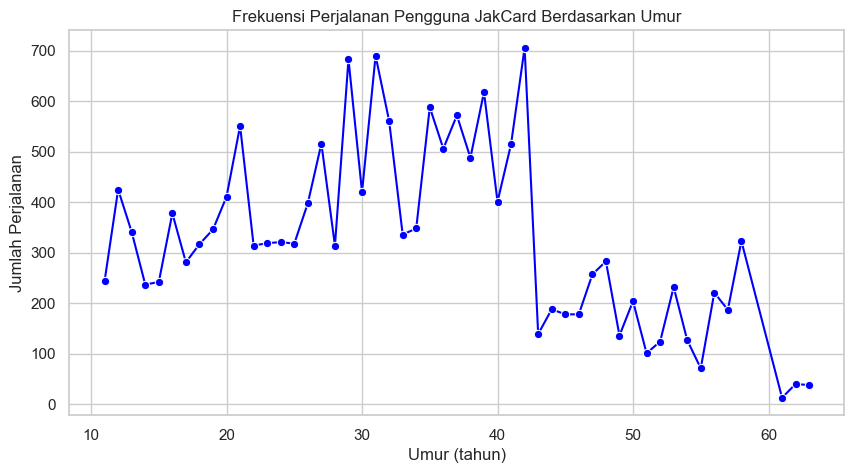

In [70]:
# Rata-rata jumlah perjalanan per umur
umur_freq = jakcard_df.groupby('age').size().reset_index(name='trip_count')

plt.figure(figsize=(10,5))
sns.lineplot(data=umur_freq, x='age', y='trip_count', marker='o', color='blue')
plt.title('Frekuensi Perjalanan Pengguna JakCard Berdasarkan Umur')
plt.xlabel('Umur (tahun)')
plt.ylabel('Jumlah Perjalanan')
plt.grid(True)
plt.show()


Berdasarkan grafik frekuensi perjalanan pengguna jakcard berdasarkan umur, kita bisa melihat seberapa dinamis usia prduktif dalam generasi milenial. Untuk memahami frekuensi dinamisasi generasi milenial kita harus memahami seperti apa karakteristik generasi milenial. Menurut [Setowara, 2023](https://brin.go.id/news/116359/karakteristik-khas-generasi-milenial-dan-z-sebagai-digital-native). Generasi milenial memiliki karakteristik khas sebagai berikut: 

1. Inklusive & progressive. Generasi milenial terbuka dengan perbedaan dan ingin sekali cepat bergerak maju, tidak hanya dalam tindakan tapi juga pikiran. Salah satu faktornya karena adanya perkembangan digital dan informasi yang sangat berpengaruh. Mereka tidak suka eksklusivitas, menolak konservatif, menolak sesuatu yang konvensional, dan mereka berpikir harus mencari cara baru.

2. Authenticity atau otentisitas. Generasi milenial ingin mencari ontentisitas dalam diri mereka, generasi ini adalah generasi yang tenggelam dalam dunia digital. Mereka sebetulnya ingin mencari jati diri mereka sendiri, tapi karena terlalu banyak informasi yang berkembang membuat mereka memaknai diri mereka dengan penafsiran yang sangat beragam.

3. Kolaborasi. Generasi milenial cenderung suka bekerja dengan orang yang berasal dari kelompok yang berbeda, kemampuan yang berbeda. Mereka bisa bersatu dan berkolaborasi untuk menjadi satu hal baru.

4. Attention seeking. Sebagai fenomena dari perkembangan zaman, ada perasaan untuk mencari atensi. Banyak anak muda yang mendapatkan popularitas, dengan capaian popularitasnya tersebut mereka share ke mana-mana untuk menunjukkan bahwa mereka berhasil. Mereka ingin menunjukkan keberhasilannya hingga mencapai titik tersebut, sehingga akan mendapat atensi dan apresiasi.

5. Instant gratification & recognition. Generasi milenial bisa bekerja sangat cepat. Issu mental health menjadi issu yang luar biasa, karena kebutuhan mereka diapresiasi. Mereka merasa punya keunikan masing-masing.

6. Sisi pragmatic idealism. Sebagai ciri khas generasi milenial yang sebetulnya masih mempertahankan nilai-nilai yang tentunya memiliki bukti konkret.

### Koridor dengan Pengguna JakCard paling banyak

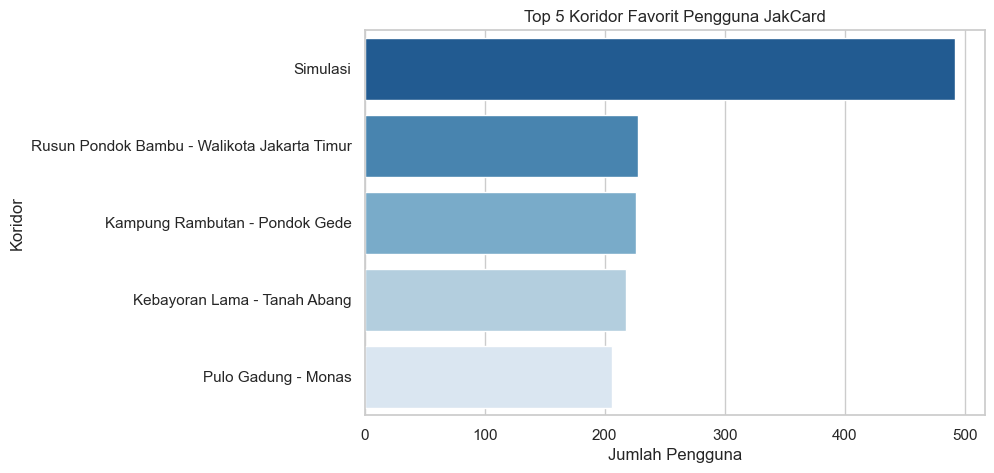

In [71]:
koridor_jakcard = jakcard_df.groupby('corridorName').size().reset_index(name='count')
top5_koridor = koridor_jakcard.sort_values(by='count', ascending=False).head(5)

plt.figure(figsize=(8,5))
sns.barplot(data=top5_koridor, x='count', y='corridorName', palette='Blues_r')
plt.title('Top 5 Koridor Favorit Pengguna JakCard')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Koridor')

plt.show()

Berdasarkan hasil top 5 koridor favorit pengguna Jakcard. Kita bisa menyimpulkan bahwa rute simulasi menempati urutan teratas. Rute rusun bambu-walikota Jakarta timor diisi dengan lebih dari 200 orang.

## Pengguna JakCard berdasarkan Gender

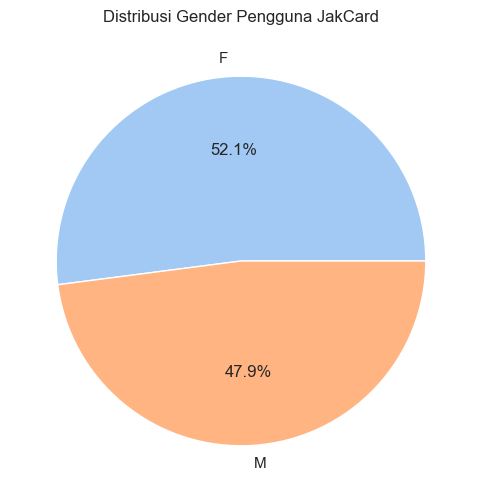

In [72]:
# Hitung jumlah pengguna per gender
gender_count = jakcard_df['payCardSex'].value_counts().reset_index()
gender_count.columns = ['Gender', 'Count']

# Visualisasi pie chart
plt.figure(figsize=(6,6))
plt.pie(gender_count['Count'], labels=gender_count['Gender'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribusi Gender Pengguna JakCard')
plt.show()

samahalnya dengan perbandingan pengguna layanan secara umum. Mayoritas pengguna kartu JakCard di dominasi oleh wanita dengan persentase 52%, untuk pengguna pria memiliki presentase 48%.

Insight:
- Berdasarkan hasil analisis diatas, kita dapat menyusun rekomendasi strategis untuk mengatasi masalah yang telah dirumuskan sebelumnya.
- Diketahui bahwa halte paling sibuk dalam rute perjalanan Transjakarta dipegang oleh halte BKN yang disusul dengan halte Penjaringan di urutan kedua. 
- Koridor perjalanan yang paling ramai ada pada rute Cibubur-Balaikota dengan *rush hour* ada pada jam kerja (jam 6 pagi dan jam 5 sore). 
- Mayoritas pengguna didominasi oleh pengguna dinamis yang mana masuk kedalam usia produktif (20-39 tahun), gender yang mendominasi yaitu perempuan. 
- Kemudian untuk metode pembayaran mayoritas pengguna memakai JakCard untuk pembayaran atau *tap in* atau *tap out*.
- Pengguna JakCard dengan jumlah perjalanan tertinggi ditempati oleh usia produktif generasi milenial yang mana ini pengguna berumur 40 tahun-an, dengan jumlah perjalanan 700 kali.
- Untuk koridor yang memiliki pengguna JakCard paling banyak di yaitu ada pada rute simulasi, kemudian rusun pondok bambu-walikota Jakarta timur.
- Sejalan dengan hasil sebelumnya, pengguna JakCard masih di dominasi oleh perempuan.

<hr>

## **C.6. Pengujian Hipotesis**

H0: Rata-rata durasi perjalanan (tapOutTime − tapInTime) sama antar koridor.

H1: Ada perbedaan rata-rata durasi perjalanan antar koridor (menandakan perbedaan efisiensi).

### Hitung durasi perjalanan (dalam menit)

In [73]:
df['duration'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60

### C.6a. Uji Normalitas

[Uji normalitas](https://www.ciputra.ac.id/uji-normalitas-cara-cek-data-berdistribusi-normal/#:~:text=Selain%20uji%20statistik%2C%20kamu%20juga,data%20terlihat%20normal%20atau%20tidak.) adalah bagian penting dalam analisis data karena bisa menentukan arah dan metode analisis selanjutnya. Dengan mengetahui apakah data berdistribusi normal atau tidak, seorang penguji bisa memilih alat analisis yang tepat dan menghindari kesalahan dalam penarikan kesimpulan.

In [74]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [75]:
from scipy.stats import shapiro

In [76]:
for corridor in df['corridorName'].unique():
    sample = df[df['corridorName'] == corridor]['duration']
    stat, p = stats.shapiro(sample)
    print(f"Normalitas {corridor}: p-value={p:.4f}")
    
if p > 0.05:
    print("Data kemungkinan berdistribusi normal (gagal tolak H0)")
else:
    print("Data tidak berdistribusi normal (tolak H0)")

Normalitas Matraman Baru - Ancol: p-value=0.0000
Normalitas Stasiun Tebet - Karet via Patra Kuningan: p-value=0.0002
Normalitas Pantai Maju - Kota: p-value=0.0000
Normalitas Pulo Gebang - Pulo Gadung 2 via PIK: p-value=0.0000
Normalitas Tanjung Priok - Pluit: p-value=0.0000
Normalitas Cibubur - Balai Kota: p-value=0.0000
Normalitas Simulasi: p-value=0.0000
Normalitas Bekasi Barat - Kuningan: p-value=0.0003
Normalitas Rempoa - Blok M: p-value=0.0000
Normalitas Kampung Melayu - Tanah Abang via Cikini: p-value=0.0011
Normalitas PGC 2 - Grogol 2: p-value=0.0002
Normalitas Pulo Gadung 2 - Tosari: p-value=0.0000
Normalitas Pasar Minggu - Jagakarsa: p-value=0.0000
Normalitas Ciputat - Kampung Rambutan: p-value=0.0001
Normalitas Ciledug - Tendean: p-value=0.0001
Normalitas Kebayoran Lama - Jelambar: p-value=0.0031
Normalitas Pinang Ranti - Pluit: p-value=0.0000
Normalitas Terminal Tanjung Priok - Ancol Barat: p-value=0.0001
Normalitas Poris Plawad - Bundaran Senayan: p-value=0.0000
Normalitas 

Insight:

Data kemungkinan berdistribusi normal (gagal tolak H0).Artinya tidak ada cukup bukti untuk menyatakan data berbeda dari distribusi normal. Untuk selanjutnya akan dilakukan uji anova

## C.6b. Uji Anova

In [77]:
model = ols('duration ~ C(corridorName)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nHasil ANOVA:")
print(anova_table)


Hasil ANOVA:
                       sum_sq       df         F        PR(>F)
C(corridorName)  4.806397e+05  211.0    2.918906  9.782153e-41
Residual         2.627996e+07  33675.0 NaN       NaN          


Dengan p-value yang hampir 0 hasilnya signifikan, yang berarti ada perbedaan rata-rata durasi perjalanan antar koridor. Berdasarkan hasil uji anova memang ada koridor yang lebih lambat/kurang efisien dibanding yang lain. Hal ini bisa disebabkan beberapa faktor seperti:

**1. Faktor Operasional**

- Pengaturan jadwal tidak sinkron. misalnya bus menumpuk di satu titik lalu kosong di titik lain.

- Frekuensi bus rendah. Frekuensi yang rendah membuat waktu tunggu penumpang lebih lama, efeknya durasi perjalanan jadi panjang.

- Waktu berhenti di halte lebih lama. misalnya karena penumpang sangat banyak, antrian panjang, atau sistem tap lambat.


**2. Faktor Infrastruktur & Rute**

- Kepadatan lalu lintas tinggi. Beberapa rute koridor kemungkinan ada yang melewati area yang padat kendaraan pribadi, perjalanan melambat.

- Banyak persimpangan & lampu merah. Meskipun memiliki jalur khusus, tetap ada titik rawan crossing yang membuat bus melambat.

- Panjang koridor. Semakin panjang rute maka semakin tinggi peluang keterlambatan (akumulasi hambatan).

- Kondisi jalur bus. Kondisi yang dimaksud misalnya ada perbaikan jalan, jalur rusak, atau tidak sepenuhnya dedicated busway.


**3. Faktor Eksternal / Lingkungan**

- Demografi & kepadatan penumpang. koridor yang melewati kawasan padat penduduk, pasar, atau pusat bisnis biasanya lebih lambat karena naik-turun penumpang lebih intens.

- Kejadian tidak terduga. kecelakaan, demo, banjir, atau hal lain yang menghambat rute tertentu.

<hr>

## C.7. Rekomendasi Strategis untuk Meningkatkan Layanan, Kenyamanan, dan Efisiensi Operasional Transjakarta

Setelah melakukan serangkaian analisis terhadap dataset Transjakarta serta beberapa sumber literasi pendukung, didapati rekomendasi strategis sebagai berikut:

1. Meningkatkan Layanan dan efisiensi operasional:

- Perkuat kapasitas di halte tersibuk dengan menambah armada & frekuensi keberangkatan di halte hub utama (BKN, Penjaringan, Terminal Senen, Monas, Kampung Rambutan).
- Diversifikasi armada. Gunakan bus listrik ukuran sedang di rute dengan kepadatan sedang agar operasional lebih hemat.
- Fokus pada jam sibuk. Sesuaikan jadwal keberangkatan agar lebih rapat pukul 06.00–09.00 dan 16.30–19.00, kemudian menambah jumlah petugas halte untuk membantu mengakomodir kendala pengguna di jam sibuk khususnya di halte yang padat penumpang.
- Membuat kampanye loyalitas transjakarta. Berikan insentif diskon atau poin reward via aplikasi TJ untuk pengguna transjakarta (terutama generasi milenial).
- Bekerjasama dengan dinas terkait untuk melakukan pemetaan dan penanganan wilayah rawan banjir, potensi demo dan padat lalulintas di sekitar rute bus transjakarta. Kemudian membuat rute alternatif agar layanan BRT tetap bisa beroperasi dengan lancar.
- Melakukan kajian serta evaluasi lebih lanjut terhadap halte yang tidak terlalu padat pengguna untuk menekan biaya operasional.
- Menambahkan mesin isi ulang mandiri di halte strategis dan padat pengguna.
- Bekerjasama dengan Bank DKI untuk membangun Smart Mobility Ecosystem. Sistem pembayaran berbasis account-based ticketing (saldo tersimpan di cloud, bukan kartu).


2. Meningkatkan kenyamanan pengguna:

- Karena mayoritas pengguna adalah wanita, bisa dipertimbangkan area tunggu khusus wanita di halte besar.
- Menambah fasilitas halte ramah pengguna dengan menambah kursi, peneduh, pencahayaan, dan jalur ramah disabilitas di halte dengan kepadatan tinggi.
- Melakukan maintenance berkala untuk mesin tap kartu. Hal ini dilakukan untu memastikan mesin lancar membaca kartu tap pengguna sehingga memperlancar operasional pada rush hour. Selain itu maintenance juga berfungsi untuk memastikan mesin tap kompatibel dengan semua metode pembayaran yang ada.
- Melakukan edukasi kepada publik mengenai penggunaan jalur khusus BRT agar tidak disusupi kendaraan pribadi. Keberadaan kendaraan pribadi yang menyelinap di jalur bus trans dapat menghambat laju serta waktu kedatangan bus.
- Informasi real-time. Memasang layar informasi keberangkatan/kedatangan bus real-time di halte sibuk serta di aplikasi TJ mengurangi ketidakpastian & stres penumpang.
- Menggunakan AI assistant dalam Aplikasi TJ maupun pada beberapa halte sibuk untuk menerima feedback maupun QnA pengguna yang juga terhubung secara realtime.

## C.7b. Keterbatasan Analisis

1. Keterbatasan Sumber Data:

    * Keterbatasan data yang tersedia membatasi kedalaman analisis yang mana dapat menciptakan bias dalam hasil.

    * Data yang digunakan mungkin hanya mencakup periode atau lokasi tertentu, sehingga hasilnya mungkin tidak sepenuhnya representatif untuk semua situasi atau populasi pengguna TransJakarta.

2. Metode Analisis:

    * Statistik deskriptif hanya memberikan gambaran umum tentang data yang diamati tanpa menghasilkan generalisasi yang kuat tentang populasi yang lebih luas.

    * Statistik deskriptif dan visualisasi data tidak selalu dapat menyediakan informasi yang cukup untuk menentukan hubungan sebab-akibat antara variabel.

4. Faktor Eksternal:

    * Faktor-faktor eksternal, seperti cuaca atau kondisi lalu lintas memiliki dampak yang tidak terduga pada hasil analisis.

    * Variabilitas lingkungan eksternal dapat sulit untuk dimodelkan atau diperhitungkan sepenuhnya dalam analisis.

## D. Menyimpan Clean Data

In [78]:
df.to_csv("data_bersih.csv", index=False)